# Assignment introduction

**Time to predict some stuff!** <br> For this assignment, we will try to predict house prices based on the features of the house in question. This means we need to do the following:

1. Load in the data (as per usual)
2. Perform some EDA to get a better understanding of the data
3. Clean up the data
4. Perform feature engineering and choose our feature dimensions
5. Create the feature and target matrix (our X's and y's)
6. Create, fit a model and evaluate performance
7. Set up a data prediction pipeline

This assignment was very much made to give you a lot of creative freedom in how you want to approach your data engineering and model creation. Creating good SML models takes a lot of thinking, effort and testing. You can expect to go back and forth in the notebook a lot to change earlier data engineering steps, so keep your assigned variable names consistent!<br><br>

(**Note:** There is no shame in not creating a super well-performing model, as long as you try out the different methods involved in SML. As the picture below illustrates, sometimes it just goes wrong) <br><br>

The order in which you perform the different steps is more or less up to you, as long as you end up with some sort of trained model that is suitable for this type of prediction. <br>
The way this notebook is laid out, is just to give you a general direction guide in terms of the overarching concepts; data filtering, data engineering, model fitting, testing and evaluation as well as setting up a data pipeline. If it's easier, you're welcome to create a separate notebook instead of working in this one, as long as you cover the tasks included.

![](https://aaubs.github.io/ds-master/media/ML_Daddy.png)

This is not an exhaustive list, but for this assignment you **will** need the following:
1. From Scikitlearn:
- Some sort of encoding library of your own choice
- train_test_split (unless you want to do it manually for whichever reason)
- Some sort of data scaler
2. A visualization library:
- I recommend matplotlib.pyplot and seaborn, but you can try to use altair if you want to
3. Pandas (not the bamboo eating kind)
- Because, duh, we need them dataframes!
4. Joblib or Pickle
- To save each component of the entire process

# Importing modules and loading in the data

**Link to the Data:** <br> https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?resource=download

In [1]:
# Import the necessary libraries
import pandas as pd # Import the pandas library for data manipulation and analysis
import numpy as np # Import the numpy library for numerical operations
import seaborn as sns # Import the seaborn library for data visualization based on Matplotlib
import altair as alt # Import the altair library for declarative data visualization in a JSON-like format
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib for creating static plots
import warnings # Import the warnings module for controlling warnings in the code
from sklearn.exceptions import ConvergenceWarning # Import the warnings module for controlling warnings in the code

In [2]:
# Import the dataset. 

## Define the URL of the dataset
file = "Housing.csv"

## Use Pandas to read the dataset into a DataFrame
df = pd.read_csv(file)

## Display the first few rows of the dataset to understand its structure
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EDA

**First things first** <br> It's always a good idea to start out with checking for missing values, and dealing with them if there are any. <br> Do we have any missing values that we need to take care of? If so, find a way to handle the missing data (ie removing or replacing/filling them)

In [3]:
# We will call the below code to ignore all future warnings in the code for getting more clearn outputs
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# First of all we will use whitegrid as the sns style 
sns.set_style("whitegrid")

In [5]:
# Understand the dataset by seing the column type and list all the column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# To show the columns which have missing values print this code
# As we could see in the .info() command, we dont have any missing values
missing_values = df.isna().any()
missing_values[missing_values].index.tolist()

[]

In [7]:
# As we can see in the above code there isnt any missing values. We can also use isnull().sum() to check for missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
missing_values

Missing values in the dataset:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Make a describe for getting statistical measures for all numericall values in the dataset
# We have just round the numbers to get it more easy to look at.
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4766729.25,1870439.62,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5150.54,2170.14,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.97,0.74,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.29,0.50,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.81,0.87,1.0,1.0,2.0,2.0,4.0
parking,545.0,0.69,0.86,0.0,0.0,0.0,1.0,3.0


**Lets visualize some of the dimensions to get a better idea of our data. <br> Create a plot that shows the distribution of the price dimension. What can we see?**

<Axes: xlabel='price', ylabel='Density'>

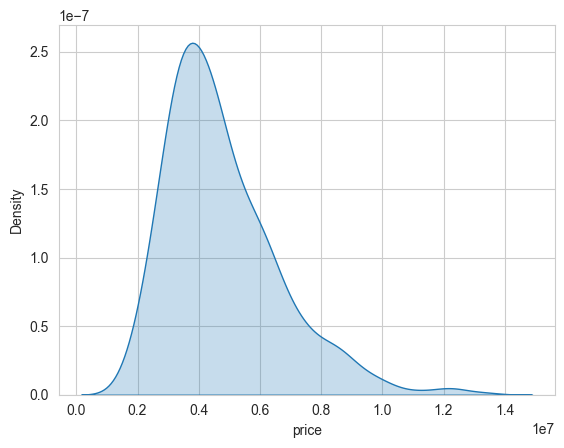

In [9]:
# As we can see in the below KDE, the most commen price is 0.4 million
sns.kdeplot(x=df['price'],fill=True, shade=True)

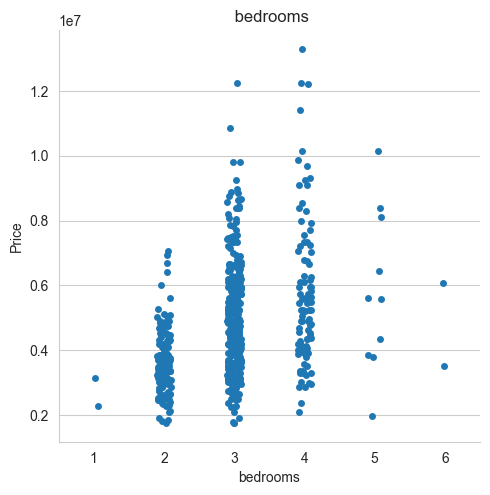

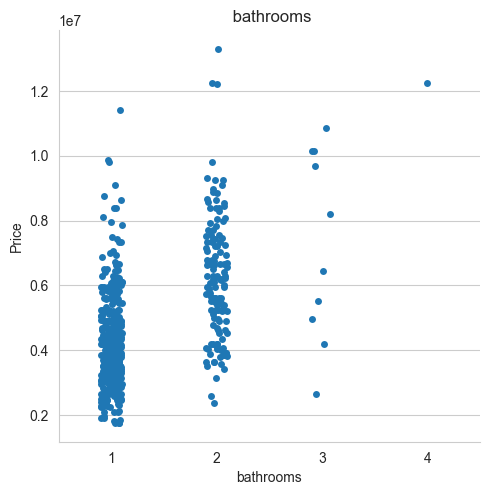

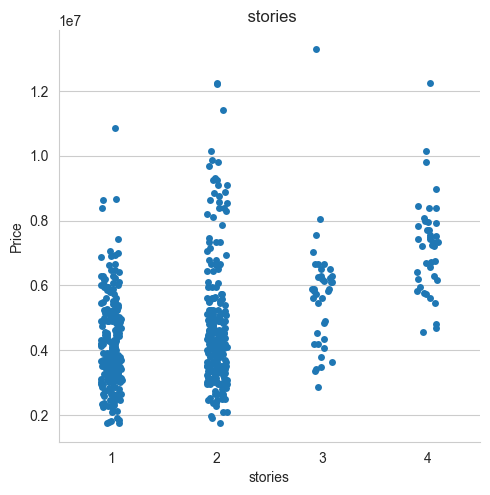

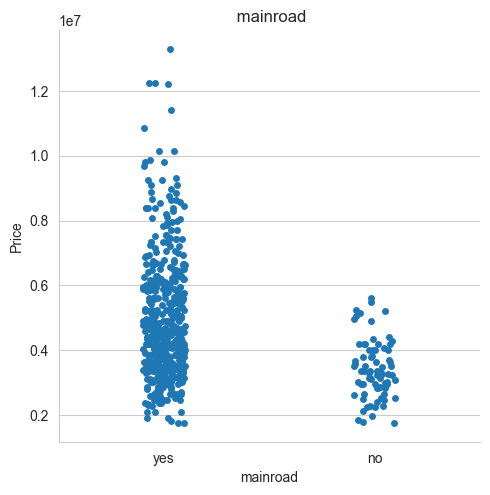

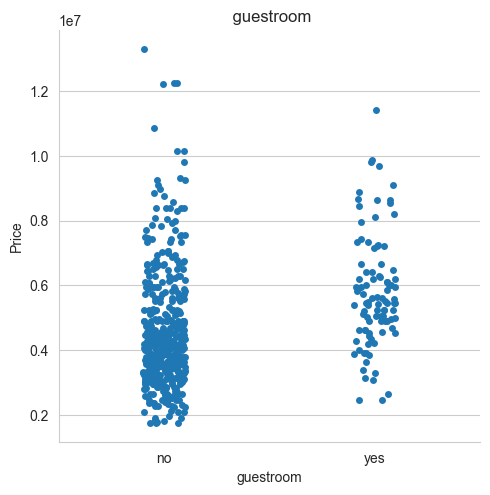

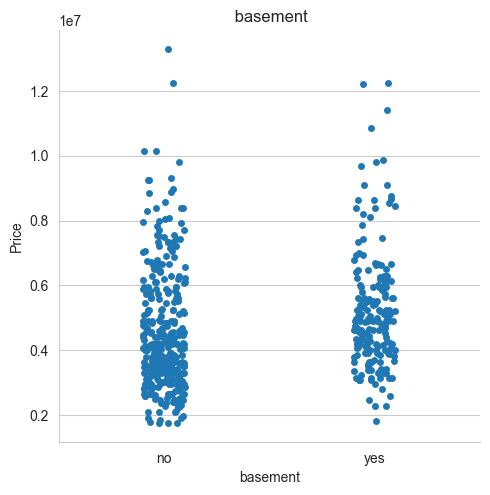

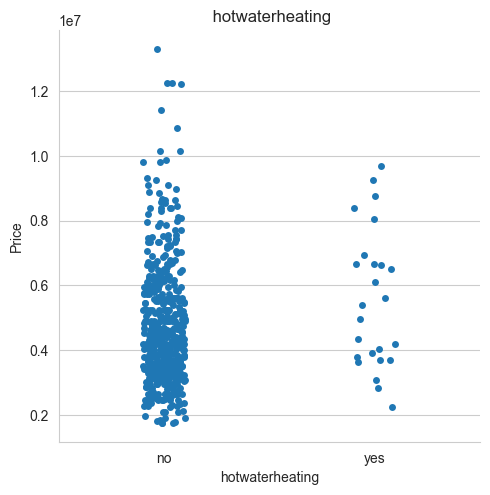

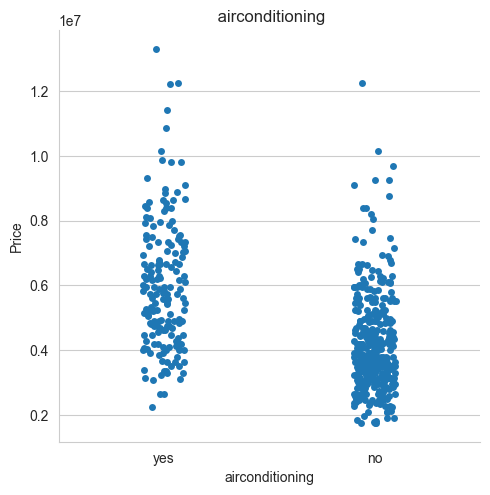

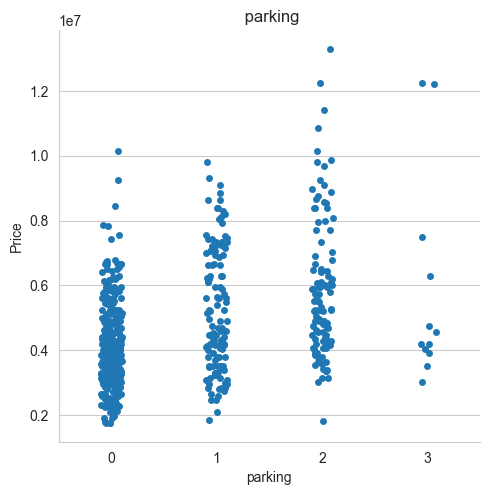

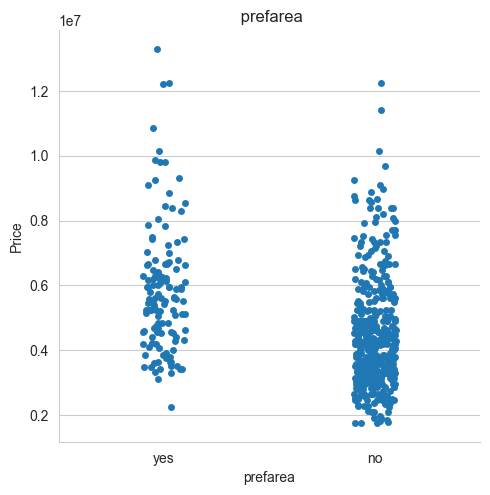

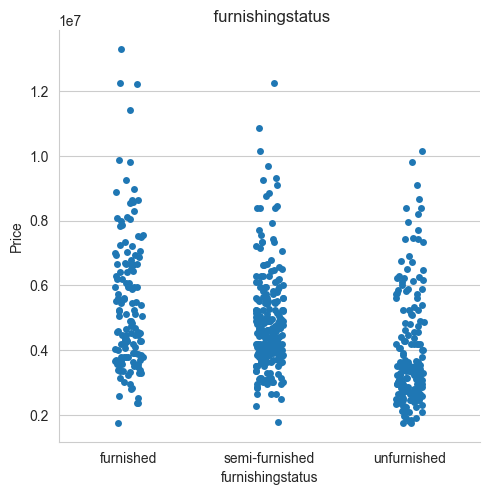

In [11]:
# List all columns except the excluded ones
# As we can see in the data is for exsample that the most listings have 2-3 bedrooms and price increases as number of bedrooms rises.
# But we can also see that 4 bedrooms are sweedspot since the price is lower for +4 bedrooms

exclude_columns = ['price', 'area']
columns_except_specific = [col for col in df.columns if col not in exclude_columns]

for column in columns_except_specific:
    sns.catplot(x=column, y="price", data=df)
    plt.title(f' {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()


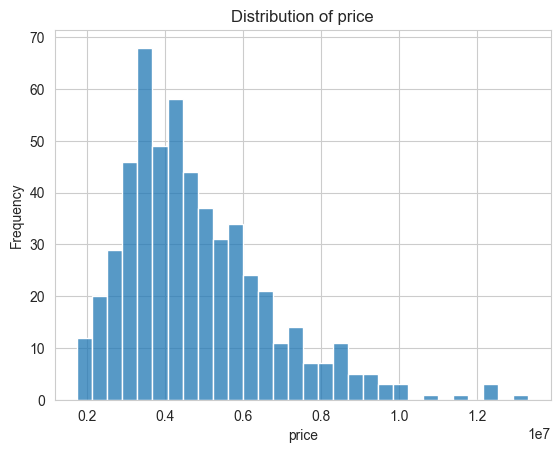

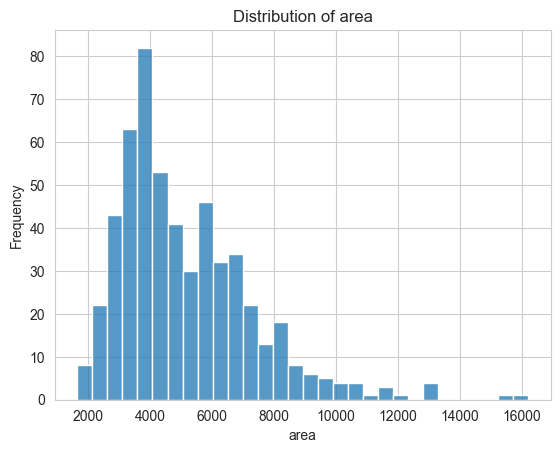

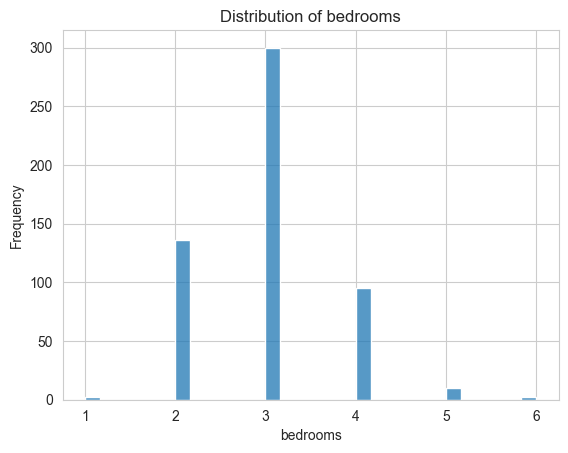

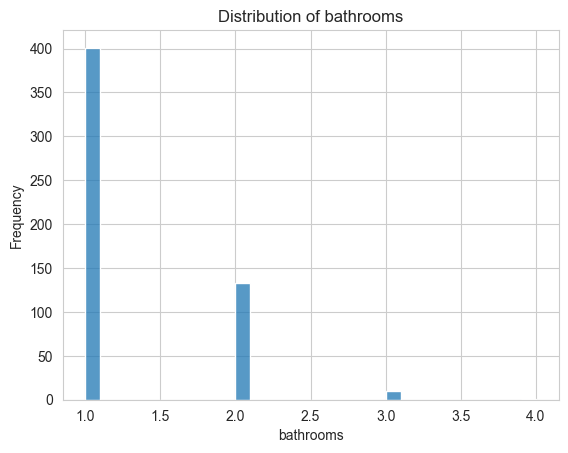

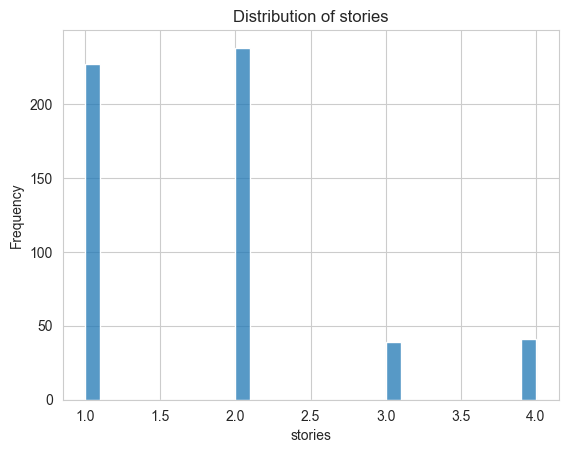

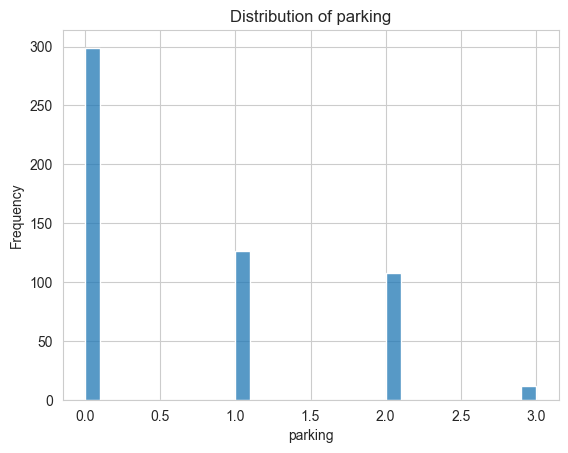

In [12]:
# Make histograms for all numerical columns
numerical_columns = df.select_dtypes(include='int').columns.tolist()

for column in numerical_columns:
    sns.histplot(df[column], kde=False, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

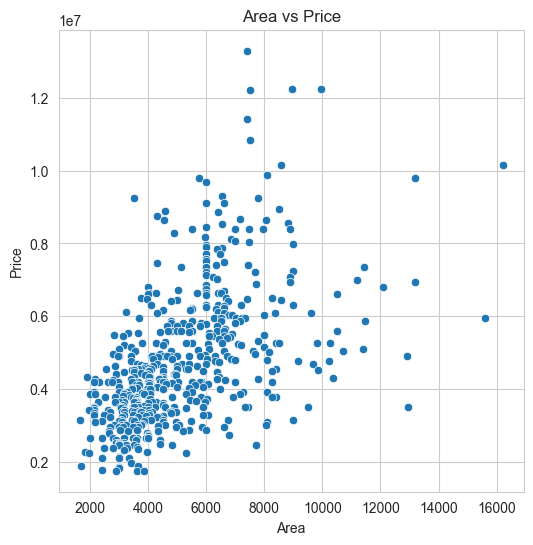

In [13]:
# As wee can see in the below graph there is a correlation between area and price.

plt.figure(figsize=(6, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

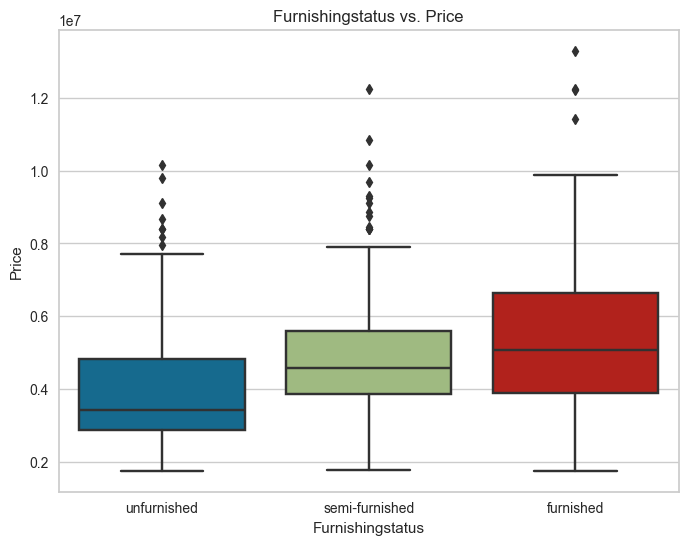

In [74]:
# We can see that the price increase with the furnishingstatus for the houses
plt.figure(figsize=(8, 6))
sns.boxplot(x="furnishingstatus", y="price", data=df, order=["unfurnished", "semi-furnished", "furnished"])
plt.xlabel("Furnishingstatus")
plt.ylabel("Price")
plt.title("Furnishingstatus vs. Price")
plt.show()

**Correlations impact our predictions through statistical inference. Thus understanding which correlations we may be dealing with, is a good tool for choosing our dimensions for the feature matrix. Often these can be quite logical with some understanding of what the data represents <br> Check the correlations of the dimensions**

In [17]:
# Calculate the correlation matrix
numeric_columns = df.select_dtypes(include='int').columns.tolist()
correlation_matrix = df[numeric_columns].corr()

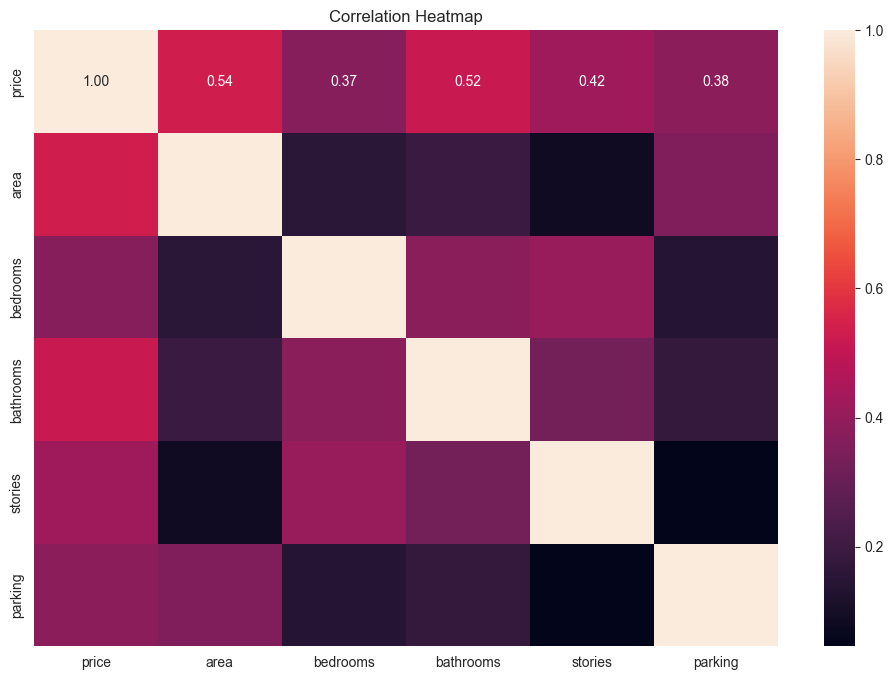

In [18]:
# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


# Data preprocessing

## Data cleaning

**Do we have any outliers in our data that may affect our prediction? If so, remove them if you think they could cause issues**

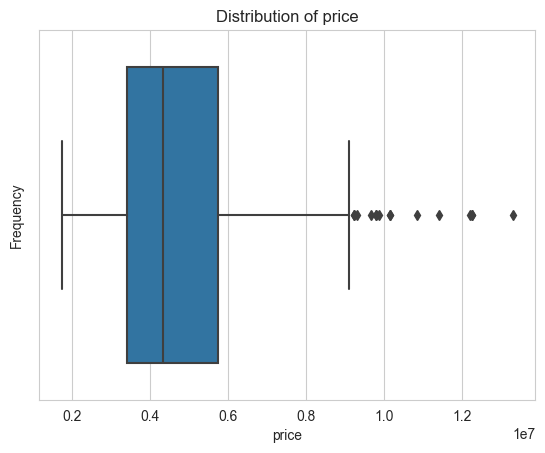

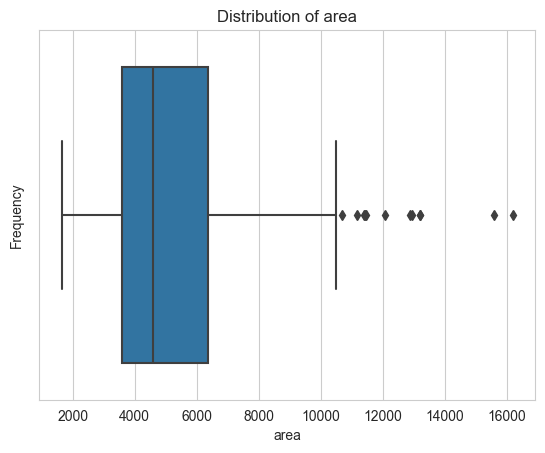

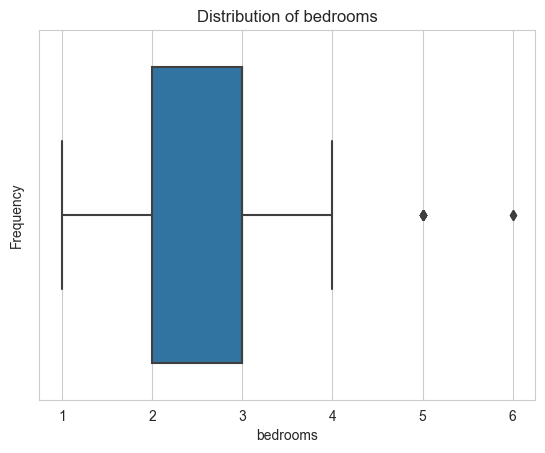

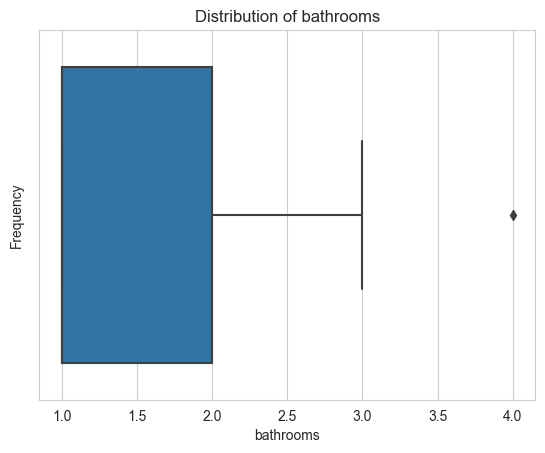

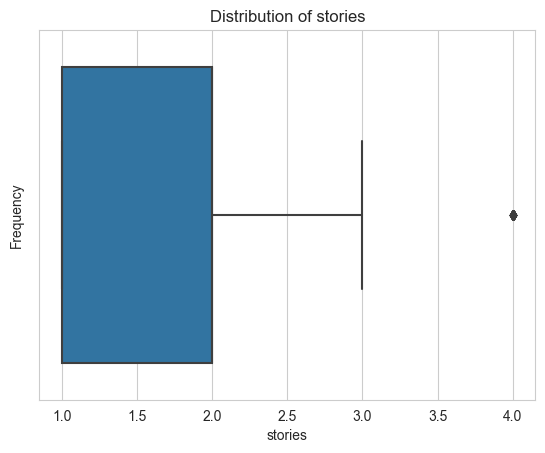

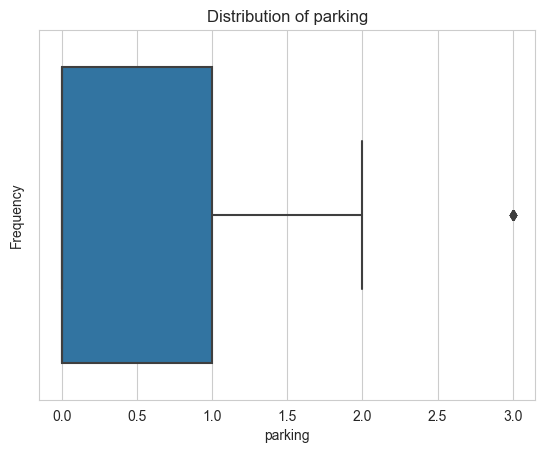

In [19]:
# To identify and potentially remove outliers from your data, we can use various statistical and visualization techniques
# Lets start by visualize the data: 
# Common visualization tools include histograms, box plots, and scatter plots

# Make box plots for all numerical columns
numerical_columns = df.select_dtypes(include='int').columns.tolist()

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [76]:
# We can also use statistical methods. S
# One common method is the IQR (Interquartile Range) method

# Here we see the outliers for the 'price' column

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define a lower and upper bound to detect outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify and display potential outliers
outliers_price = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]
outliers_price


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [77]:
# Here we see the outliers for the 'bedrooms' column
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound to detect outliers
lower_bound_bedrooms = Q1 - 1.5 * IQR
upper_bound_bedrooms = Q3 + 1.5 * IQR

# Identify and display potential outliers
outliers_bedrooms = df[(df['bedrooms'] < lower_bound_bedrooms) | (df['bedrooms'] > upper_bound_bedrooms)]
outliers_bedrooms

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
89,6440000,8580,5,3,2,yes,no,no,no,no,2,no,furnished
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
143,5600000,4800,5,2,3,no,no,yes,yes,no,0,no,unfurnished
152,5565000,5400,5,1,2,yes,yes,yes,no,yes,0,yes,furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
340,3850000,5300,5,2,2,yes,no,no,no,no,0,no,semi-furnished
356,3773000,2520,5,2,1,no,no,yes,no,yes,1,no,furnished


In [22]:
# Here we see the outliers for the 'area' column
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

# Define a lower and upper bound to detect outliers
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Identify and display potential outliers
outliers_area = df[(df['area'] < lower_bound_area) | (df['area'] > upper_bound_area)]
outliers_area

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [78]:
df_clean = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]
df_clean.info() #Now there is 530 records instead of 545

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             530 non-null    int64 
 1   area              530 non-null    int64 
 2   bedrooms          530 non-null    int64 
 3   bathrooms         530 non-null    int64 
 4   stories           530 non-null    int64 
 5   mainroad          530 non-null    object
 6   guestroom         530 non-null    object
 7   basement          530 non-null    object
 8   hotwaterheating   530 non-null    object
 9   airconditioning   530 non-null    object
 10  parking           530 non-null    int64 
 11  prefarea          530 non-null    object
 12  furnishingstatus  530 non-null    object
dtypes: int64(6), object(7)
memory usage: 58.0+ KB


In [84]:
df_clean = df_clean[(df_clean['area'] >= lower_bound_area) & (df_clean['area'] <= upper_bound_area)]
df_clean.info() #Now there is 520 records instead of 545

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             520 non-null    int64 
 1   area              520 non-null    int64 
 2   bedrooms          520 non-null    int64 
 3   bathrooms         520 non-null    int64 
 4   stories           520 non-null    int64 
 5   mainroad          520 non-null    bool  
 6   guestroom         520 non-null    bool  
 7   basement          520 non-null    bool  
 8   hotwaterheating   520 non-null    bool  
 9   airconditioning   520 non-null    bool  
 10  parking           520 non-null    int64 
 11  prefarea          520 non-null    bool  
 12  furnishingstatus  520 non-null    object
dtypes: bool(6), int64(6), object(1)
memory usage: 31.6+ KB


**Is there any other cleaning that needs to be done? If you believe so, then perform the remaining cleaning and then proceed to the next step**

In [83]:
# I change the strings 'yes' and 'no' to booleans
mapping = {'no':False,'yes':True}
df_clean[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] =  df_clean[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].replace(mapping)

In [82]:
# Rememeber to reset index number after filtering. We will make a join on the index later on
df_clean = df_clean.reset_index(drop=True)
df_clean.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,True,False,True,False,False,2,False,semi-furnished
1,9100000,6600,4,2,2,True,True,True,False,True,1,True,unfurnished
2,8960000,8500,3,2,4,True,False,False,False,True,2,False,furnished
3,8890000,4600,3,2,2,True,True,False,False,True,2,False,furnished
4,8855000,6420,3,2,2,True,False,False,False,True,1,True,semi-furnished


## Feature engineering

**So far we've gotten an idea of how our data is correlated, and we may already have an idea of which features we wish to use for our feature matrix. We can however do more than simply check correlations between data points. We can check what's known as feature importances. In order to do this we need to engineer the data in a way so that we can feed it to the SML model we choose.**

**BONUS TASK:** <br>
It may be possible to define new features, for example as a combination of two existing ones in order to increase predictability. If you believe you can create new features, this is the time to do it <br>
(Note: This step is not necessarily needed, but more if you're feeling adventurous, or if your model is not performing as well as you had hoped)

**In order to fit a model to our data, we need to encode the categorical values for prediction. <br> Encode the categorical features in the dataframe**

In [27]:
import itertools # Import the itertools module for efficient looping and iteration
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Import the StandardScaler and OneHotEncoder classes from scikit-learn for data preprocessing
from sklearn.model_selection import train_test_split # Import the train_test_split function from scikit-learn for splitting data into training and testing sets
from xgboost import XGBRegressor # Import the XGBRegressor class from the XGBoost library for gradient boosting regression
from yellowbrick.features import FeatureImportances # Import the FeatureImportances class from the Yellowbrick library for visualizing feature importances

In [28]:
# First we will defines the X variables of our features
X = df_clean.iloc[:,1:]
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [29]:
# We need to encode our categorical values into meaningful numerical values. 
# The method for encoding data, heavily depends on the type of data you're working with.

# OneHotEncoding will create a new column for each categorical value, and assign it either 0 or 1 to indicate the impact 
# of this categorical value to the prediction. 

# Label encoding will merely label each category with values from 0 and upwards, depending on the
# amount of unique values in that column/dimension.

# In summary, the choice between LabelEncoder and OneHotEncoder depends on the nature of your data and the 
# requirements of your machine learning model. If there's an ordinal relationship (like a ranking system) 
# or if you're encoding target variables, LabelEncoder may be appropriate. For nominal data or when you want to 
# avoid ordinal assumptions, OneHotEncoder is typically the better choice.

# Picks the catagorical value that i want to encode
df_cat = X[['furnishingstatus']]

# I create my encoder that i will us for the encoding
ohe_cat = OneHotEncoder(sparse=False)

# Then i use the encoder on my catagorical value
cat_ohe = ohe_cat.fit_transform(df_cat)      
cat_ohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [30]:
# Then i create a list of the 3 different categories, and call it columns, so that i can use this for column name in my dataframe
columns_cat_ohe = list(itertools.chain(ohe_cat.categories_))
columns_cat_ohe

[array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]

In [31]:
# This is made to a dataframe with 3 columns one for each categorie in the categorical value
X_catagorical = pd.DataFrame(cat_ohe, columns = columns_cat_ohe)
X_catagorical

,furnished,semi-furnished,unfurnished
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
515,0.0,0.0,1.0
516,0.0,1.0,0.0
517,0.0,0.0,1.0
518,1.0,0.0,0.0


In [32]:
# First we create the standard scaler
scaler = StandardScaler()

# And then use the standardscaler on all the variables exept the categorical (which is the 'furnishingstatus'. We have encoded this with OneHotEncoder)
scaled_nummerical = scaler.fit_transform(X.iloc[:,:11])

In [33]:
# We will then insert the scaled value in X dataframe (in the 12 th column)
X.iloc[:,:11] = scaled_nummerical
X.iloc[:,:11]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,0.591225,1.445867,-0.565407,0.240573,0.416911,-0.463631,1.374369,-0.210183,-0.666667,1.599249,-0.526917
1,0.920438,1.445867,1.580662,0.240573,0.416911,2.156890,1.374369,-0.210183,1.500000,0.409536,1.897833
2,1.962943,0.078865,1.580662,2.557205,0.416911,-0.463631,-0.727607,-0.210183,1.500000,1.599249,-0.526917
3,-0.176937,0.078865,1.580662,0.240573,0.416911,2.156890,-0.727607,-0.210183,1.500000,1.599249,-0.526917
4,0.821674,0.078865,1.580662,0.240573,0.416911,-0.463631,-0.727607,-0.210183,1.500000,0.409536,1.897833
...,...,...,...,...,...,...,...,...,...,...,...
515,-1.054836,-1.288136,-0.565407,-0.917743,0.416911,-0.463631,1.374369,-0.210183,-0.666667,1.599249,-0.526917
516,-1.384049,0.078865,-0.565407,-0.917743,-2.398593,-0.463631,-0.727607,-0.210183,-0.666667,-0.780177,-0.526917
517,-0.714650,-1.288136,-0.565407,-0.917743,0.416911,-0.463631,-0.727607,-0.210183,-0.666667,-0.780177,-0.526917
518,-1.104218,0.078865,-0.565407,-0.917743,-2.398593,-0.463631,-0.727607,-0.210183,-0.666667,-0.780177,-0.526917


In [34]:
# We can see the total X dataframe to see the df after the standard scaler encoding
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.591225,1.445867,-0.565407,0.240573,0.416911,-0.463631,1.374369,-0.210183,-0.666667,1.599249,-0.526917,semi-furnished
1,0.920438,1.445867,1.580662,0.240573,0.416911,2.156890,1.374369,-0.210183,1.500000,0.409536,1.897833,unfurnished
2,1.962943,0.078865,1.580662,2.557205,0.416911,-0.463631,-0.727607,-0.210183,1.500000,1.599249,-0.526917,furnished
3,-0.176937,0.078865,1.580662,0.240573,0.416911,2.156890,-0.727607,-0.210183,1.500000,1.599249,-0.526917,furnished
4,0.821674,0.078865,1.580662,0.240573,0.416911,-0.463631,-0.727607,-0.210183,1.500000,0.409536,1.897833,semi-furnished


In [35]:
# Now we will join the encoded categorical values (ended with one hot encoder) with the numerical values in the X
# We are using iloc[:,:11] with means that we are only taking the numerical values and therefore are dropping the categorical 
X = X.iloc[:,:11].join(X_catagorical)

In [36]:
# Define a dictionary to rename the columns
column_mapping = {('furnished',): 'furnished', ('semi-furnished',): 'semi-furnished', ('unfurnished',): 'unfurnished'}

# Use the dictionary to rename the columns
X = X.rename(columns=column_mapping)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,0.591225,1.445867,-0.565407,0.240573,0.416911,-0.463631,1.374369,-0.210183,-0.666667,1.599249,-0.526917,0.0,1.0,0.0
1,0.920438,1.445867,1.580662,0.240573,0.416911,2.156890,1.374369,-0.210183,1.500000,0.409536,1.897833,0.0,0.0,1.0
2,1.962943,0.078865,1.580662,2.557205,0.416911,-0.463631,-0.727607,-0.210183,1.500000,1.599249,-0.526917,1.0,0.0,0.0
3,-0.176937,0.078865,1.580662,0.240573,0.416911,2.156890,-0.727607,-0.210183,1.500000,1.599249,-0.526917,1.0,0.0,0.0
4,0.821674,0.078865,1.580662,0.240573,0.416911,-0.463631,-0.727607,-0.210183,1.500000,0.409536,1.897833,0.0,1.0,0.0


In [37]:
# As we can see, we have encoded all values to floats and we have the catogorical feature as one hot encoded
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             520 non-null    float64
 1   bedrooms         520 non-null    float64
 2   bathrooms        520 non-null    float64
 3   stories          520 non-null    float64
 4   mainroad         520 non-null    float64
 5   guestroom        520 non-null    float64
 6   basement         520 non-null    float64
 7   hotwaterheating  520 non-null    float64
 8   airconditioning  520 non-null    float64
 9   parking          520 non-null    float64
 10  prefarea         520 non-null    float64
 11  furnished        520 non-null    float64
 12  semi-furnished   520 non-null    float64
 13  unfurnished      520 non-null    float64
dtypes: float64(14)
memory usage: 57.0 KB


## Creating target and feature + final evaluation of dimensions

**Separate the target feature from the rest**

In [38]:
# First we define y. The y-value is the value that we want to predict
y = df_clean.price

**Next up:**<br> I want you to evaluate whats known as the feature importances of the data. (Hint: Most SML models has a class attribute for this) <br>
**Reflect:**<br> Do we evaluate feature importances *before* or *after* we do the train_test_split? What are some possible issues/benefits with either approach? <br>
**Task:** Evaluate the feature importances of your data.

**Solution:** I do this *BEFORE* the feature importances, as I wish to increase the models ability to generalize to new data. If we base our selection on feature importances of all the data, it may lead to overly optimistic model evaluation.

In [39]:
# First we want to split the data into training and testing sets
# X is your feature matrix, y is your target variable
# test_size specifies the proportion of data to be used for testing (20% in this case)
# random_state is set to 1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((416, 14), (104, 14), (416,), (104,))

In [40]:
# Create an instance of the XGBoost Regressor model
model_xgb = XGBRegressor()

In [41]:
# Train the XGBoost Regressor model on the training data by fitting the model to the train data
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

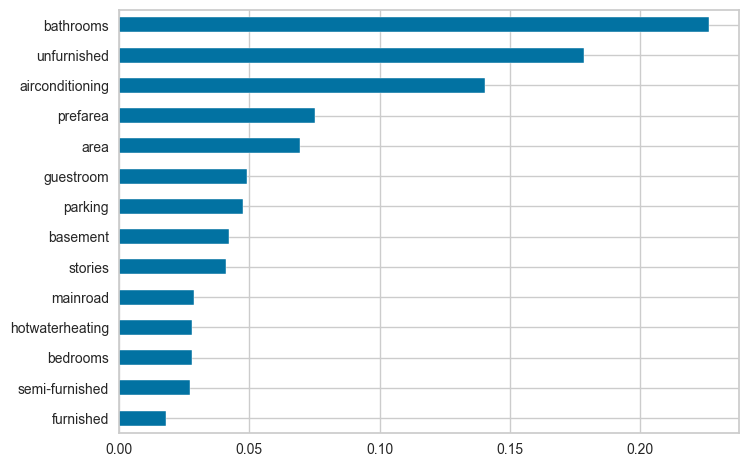

In [87]:
# Create a Series of feature importances with feature names as index
feat_importances = pd.Series(model_xgb.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot the features  as a horizontal bar chart
feat_importances.plot(kind='barh')

**Now that you have selected your target features through whichever method you preferred, you need to remove the excess features that you don't need.** <br>
*Note: If you've already performed the train_test_split, remember to remove them from both the test and training data*

# Fitting, testing and evaluating the model

**Okay! Now we got our feature and target matrix sorted (for now), we finally get to actually create our machine learning model.** <br><br>
**Task:** Select a suitable model for the type of prediction we are trying to make, fit it to your data and evaluate the performance using appropriate metrics. <br><br>
**Reflect**: Is the model performing well? If not, how can we increase the performance?

In [43]:
# Import necessary libraries for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Create instances of regression models
# We have allready created the model for model_xgb = XGBRegressor()
model_ols = LinearRegression()
model_rf = RandomForestRegressor()

In [45]:
# Train the regression models on the training data by fitting the model to the data
model_xgb.fit(X_train, y_train)
model_ols.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
# Print the training scores for each model
print('Model OLS' + ' ' + str(model_ols.score(X_train, y_train))) # score in term of r^2
print('Model xgb' + ' ' + str(model_xgb.score(X_train, y_train))) # for some reason worse, might be because of the default hyperparameters bad
print('Model RF' + ' ' + str(model_rf.score(X_train, y_train)))

Model OLS 0.6693011663104933
Model xgb 0.9972473082991459
Model RF 0.9467314261502304


## **BONUS TASK - Hyperparameter tuning using GridSearchCV:**

One way to increase model performance is to perform what's known as a grid search of the hyperparameters of the model. Basically we try out different combinations of these hyperparameters in order to find the most optimal setup based on some form of scoring metric. Give it a try!  <br><br>
**NOTE:** These can take a while to run, so whilst it is a good approach, it ***can*** also cost a lot of time, and as you may have experienced, Colab tends to time out after a while. A way to think of it is the following;<br><br>

$$
\text {Total models tested} = \text {(Number of variables for parameter 1)} \space \times \text {(Number of variables for parameter 2)} \space \times \text {(Number of variables for parameter 3)} \space \text {...}\space \times \text {(Number of variables for parameter n)}
$$ <br>

**So if you're testing out the following param_grid;**
<br>3 variations of parameter 1,
<br>4 variations of parameter 2,
<br> 2 variations of parameter 3,
<br> 2 variations of parameter 5,
<br>5 variations of parameter 6
<br><br>**You get the following:** <br><br>

$$
\text {Total models tested} = 3 \times 4 \times 2 \times 2 \times 5 = 240
$$ <br>
As you can see it goes up quick, as we are already testing 240 versions of the model with different parameters. Whilst testing upwards of even 100 variations doesn't necessarily take that long (which I tried), you should still be careful to not just increase it to try out all possible combinations there are

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# Define your XGBoostRegressor model by creating a instances of regression models
xgb_reg = XGBRegressor()

In [88]:
# Define a dictionary of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [51]:
# Create the GridSearchCV object with cross-validation (cv=5) and scoring method (neg_mean_squared_error)
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [52]:
# Fit the grid search to your data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [53]:
# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [54]:
# Access and save the best performing model from the grid_search using the .best_estimator_ attribute
best_xgb_reg = grid_search.best_estimator_

## **Save the model components**

**When we have created our model, we want to able to use it outside of our development notebook, for this purpose we need to save each component we used for preprocessing, as well as the model itself**<br>
**Task:** <br>
Save the model components (the prediction model itself, the scaler and the label encoder)

In [55]:
import pickle

In [56]:
# Saving one of the model just to showcase how it is done
model_xgb.save_model('model_xgb.json')

In [57]:
# Saving the scaler
# wb = binary write mode
pickle.dump(scaler, open('scaler.pkl','wb'))

In [58]:
# Saving the label encoder
pickle.dump(ohe_cat, open('ohe.pkl','wb'))

# Creating the data pipeline

**Finally we want to streamline our preprocessing and prediction methods for new data points. To do this, we create what's known as a data pipeline. It's basically a function that performs the *same* preprocessing steps as what we did earlier on a new observation** <br><br>
**Task 1:** <br> Load in your components, and create a data pipeline function that will perform the preprocessing steps you did earlier all in one. Apply it to a new observation. <br><br>
**Task 2:** <br> Load in your model, and create a prediction function that will predict an outcome based on this new observation

In [59]:
# Import necessary libraries for prediction
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

In [60]:
# First create a pipeline with a StandardScaler and a LinearSVC classifier
pipe = Pipeline([("scaler", StandardScaler()), ("svm", LinearSVC())])

In [61]:
# Fit the pipeline on the training data 
# and print the test score (accuracy) of the model on the test data
pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.05


In [62]:
# Perform cross-validation and print the scores
scores = cross_val_score(pipe, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.02884615 0.01923077 0.00961538 0.01923077 0.00961538]
Average cross-validation score: 0.02


In [63]:
# Fit the pipeline on the training data again
# and print information about the SVM component of the pipeline
pipe.fit(X_train, y_train)
print("SVM component: {}".format(pipe.steps[1][1]))

SVM component: LinearSVC()


In [64]:
# Create a shorter pipeline using make_pipeline
# and print the steps of the shorter pipeline
pipe_short = make_pipeline(StandardScaler(), LinearSVC(C=100))
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('standardscaler', StandardScaler()), ('linearsvc', LinearSVC(C=100))]


In [65]:
# Create a new DataFrame with numerical features to test our model
new_df_num = pd.DataFrame({
    'area': 6500,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 1,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 0,
    'hotwaterheating': 1,
    'airconditioning': 0,
    'parking': 1,
    'prefarea': 1
}, index = [0])

In [ ]:
# Transform the new numerical data using the previously fitted StandardScaler
new_values_num = pd.DataFrame(scaler.transform(new_df_num), columns = new_df_num.columns, index=[0])

In [ ]:
# Create a new DataFrame with categorical features
new_df_cat = pd.DataFrame({
    'furnishingstatus': 'furnished'
}, index=[0])

In [ ]:
# Transform the new categorical data using the previously fitted One-Hot Encoder
cats = list(itertools.chain(ohe_cat.categories_))
new_values_cat = pd.DataFrame(ohe_cat.transform(new_df_cat), columns = cats , index=[0])

In [67]:
new_values_num

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,0.865569,1.445867,1.580662,-0.917743,0.416911,-0.463631,-0.727607,4.757769,-0.666667,0.409536,1.897833


In [68]:
# Combine the numerical and categorical features into one DataFrame by joining them by index
line_to_pred = new_values_num.join(new_values_cat)

# Define a dictionary to rename the columns again and then use the dictionary to rename the columns
column_mapping = {('furnished',): 'furnished', ('semi-furnished',): 'semi-furnished', ('unfurnished',): 'unfurnished'}
line_to_pred = line_to_pred.rename(columns=column_mapping)

# The line to predict is listet
line_to_pred

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,0.865569,1.445867,1.580662,-0.917743,0.416911,-0.463631,-0.727607,4.757769,-0.666667,0.409536,1.897833,1.0,0.0,0.0


In [69]:
# Make predictions using the XGBoost model on the combined data
model_xgb.predict(line_to_pred)

array([6654782.5], dtype=float32)

# Bonus task: Create an interface to interact with your model

You can either create a simple gradio interface, or alternatively create a streamlit application.

In [70]:
# Import necessary libraries as gradio for making a prediction app
import gradio as gr

/Users/tobiasmjensen/anaconda3/envs/bds-sml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [71]:

def house_price(area=6500,bedrooms=4,bathrooms=2, stories=1,mainroad=1,guestroom=0,basement=0,hotwaterheating=1,airconditioning=0,parking=1,prefarea=1): #parameter = default_value

  """
      Predicts the house price based on input features.

      Parameters:
          - area: Area of the house (default=6500)
          - bedrooms: Number of bedrooms (default=4)
          - bathrooms: Number of bathrooms (default=2)
          - stories: Number of stories (default=1)
          - mainroad: Main road connectivity (default=1)
          - guestroom: Guestroom availability (default=0)
          - basement: Basement availability (default=0)
          - hotwaterheating: Hot water heating availability (default=1)
          - airconditioning: Air conditioning availability (default=0)
          - parking: Parking availability (default=1)
          - prefarea: Preferred area (default=1)

      Returns:
          - Predicted house price based on the input features.
      """

  # Create a DataFrame with the input features
  new_df_num = pd.DataFrame({
      'area': [area],
      'bedrooms': [bedrooms],
      'bathrooms': [bathrooms],
      'stories': [stories],
      'mainroad': [mainroad],
      'guestroom': [guestroom],
      'basement': [basement],
      'hotwaterheating': [hotwaterheating],
      'airconditioning': [airconditioning],
      'parking': [parking],
      'prefarea': [prefarea]
  })

  # Transform the categorical feature using the fitted One-Hot Encoder
  cats = list(itertools.chain(ohe_cat.categories_))
  new_df_cat = pd.DataFrame({
  'furnishingstatus': 'furnished'
  }, index=[0])

  # Transform the numerical feature using the fitted StandardScaler
  new_values_cat = pd.DataFrame(ohe_cat.transform(new_df_cat), columns = cats , index=[0])

  new_values_num = pd.DataFrame(scaler.transform(new_df_num), columns = new_df_num.columns, index=[0])
  
  # Combine the numerical and categorical features into one DataFrame
  line_to_pred = new_values_num.join(new_values_cat)

  # Rename the columns for compatibility with the model
  column_mapping = {('furnished',): 'furnished', ('semi-furnished',): 'semi-furnished', ('unfurnished',): 'unfurnished'}
  line_to_pred = line_to_pred.rename(columns=column_mapping)

  # Use the XGBoost model to make a price prediction
  prediction = model_xgb.predict(line_to_pred)

  return prediction[0]

In [72]:
# Test the prediction function by running it with the default values
# The default values is the values we used with testing the model.
# As you can see the result is the same
house_price()

6654782.5

In [73]:
# Create a Gradio interface for the house price prediction function
iface = gr.Interface(
    fn=house_price, # The function to be used for predictions
    inputs=["number", "number", "number", "number", "number", 'number','number','number','number','number','number'], # setting the input format
    outputs="text", # The output format (text)
    live=True, # Enable live updates
    title="House price prediction", # Title of the Gradio app
    description="Predict house price in California based on input features." # Description of the app's purpose
)

# Launching the Gradio app
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
